# Check water summary files of different runs

### The issue: the wofs product has horizental artefacts at lat -26 etc. where is the bug?

Fei Zhang 2016-02-02

In [1]:
import sys,os,time


WofsRunDir='/g/data/u46/wofs/water_FZ20160203' #'/g/data/u46/wofs/water_zf2'  

WofsRunDir2='/g/data/u46/fxz547/wofs/water_144-026' # this dir run a few days later than WofsRunDir _zf2, has more NBAR

# which cell?
#checkcell= '135_-012' checkcell= '145_-017'  checkcell= '145_-018'
#checkcell= '144_-027' #'143_-026' # '144_-026'
checkcell= '145_-044'

water_summary_files=[]
water_summary_files.append (os.path.join(WofsRunDir,'summaries','waterSummary_'+ checkcell+'.tiff'))
water_summary_files.append (os.path.join(WofsRunDir,'summaries','waterSummary_'+ checkcell+'.tiff'))
#water_summary_files.append( os.path.join(WofsRunDir,'summaries_bugResults','waterSummary_'+ checkcell+'.tiff') )
#water_summary_files.append( os.path.join(WofsRunDir2,'summaries_old_wrong','waterSummary_'+ checkcell+'.tiff') )

In [3]:
print water_summary_files

['/g/data/u46/wofs/water_FZ20160203/summaries/waterSummary_145_-044.tiff', '/g/data/u46/wofs/water_FZ20160203/summaries/waterSummary_145_-044.tiff']


In [ ]:
#!ls -l  /g/data/u46/wofs/water_zf2/summaries/waterSummary_135_-012.tiff 
#!ls -l /g/data/u46/wofs/water_zf2/pyramids/WaterObservations/0/water_obs_135_-012.tiff

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.stats as spys

import gdal
from gdalconst import *

def readtiff(geofile):


    # Register drivers
    gdal.AllRegister()

    # Open image
    ds = gdal.Open(geofile, GA_ReadOnly)

    if ds is None:
        raise Exception('Could not open image file %s' %(geofile))
        

    # get image size
    rows = ds.RasterYSize
    cols = ds.RasterXSize
    numbands = ds.RasterCount

#     print 'rows= %s, cols= %s, number of bands = %s' %(str(rows), str(cols), str(numbands))
#     print ("********************")

    # get projection and resolution info of the raster
    proj = ds.GetProjection()

    transform = ds.GetGeoTransform()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = transform[5]

#     print ("Projection Info = %s"%(proj))
#     print ("xOrigin = %s,  yOrigin = %s "%(xOrigin, yOrigin))
#     print ("pixelWidth = %s,  pixelHeight = %s "%(pixelWidth, pixelHeight))
    
    # Read the data into numpy array
    numarray=[]
    for i in range(1,numbands+1):
        band =ds.GetRasterBand(i)  # the very first band is i=1
        data = band.ReadAsArray(0,0,cols,rows) #.astype('float32')
        numarray.append(data)
    
    # Once we're done, close properly the dataset
    ds = None
    
    return numarray


#if __name__ == "__main__":
#    infile = sys.argv[1]
#    nparlist = readtiff(infile)

In [5]:
watsum=[1,2]
watsum[0]=readtiff(water_summary_files[0])

watsum[1]=readtiff(water_summary_files[1])

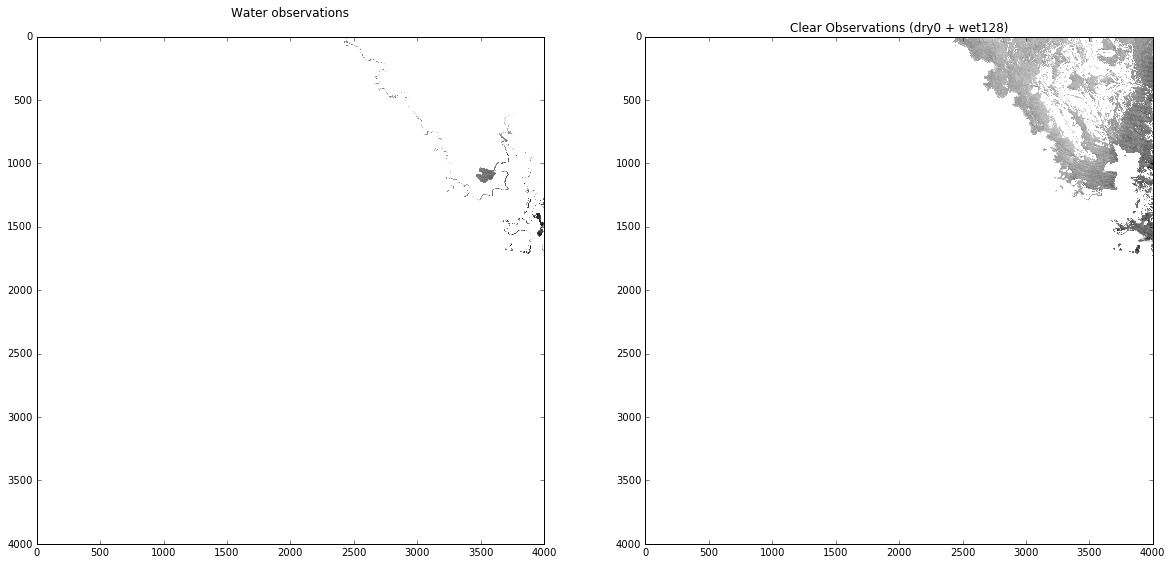

In [6]:
f, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(watsum[0][0], cmap='Greys')
ax[0].set_title('%s\n'%('Water observations'))
#plt.show()    

ax[1].imshow(watsum[0][1], cmap='Greys')
ax[1].set_title('Clear Observations (dry0 + wet128)')

plt.show()


In [ ]:
f, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(watsum[1][0], cmap='Greys')
ax[0].set_title('%s\n'%('Water observations'))
#plt.show()    

ax[1].imshow(watsum[1][1], cmap='Greys')
ax[1].set_title('Clear Observations (dry0 + wet128)')

plt.show()

In [ ]:
# test if the WaterSummary is the same in band1 
(watsum[0][0] == watsum[1][0]).all()

In [ ]:
# water sumaries band-2  The Clear Observations 0 128
(watsum[0][1] == watsum[1][1]).all()

In [ ]:
# test if the ClearObservation is the same as the band2 of the water summary?
print np.sum( watsum[0][0]), np.sum( watsum[0][1])

print np.sum( watsum[1][0]), np.sum( watsum[1][1])


# Comparision of Pixel Values

## Compare two bands - numpy arrays

In [ ]:
# where water summary differs
np.where(watsum[0][0] != watsum[1][0] )

In [ ]:
# where water summary  >= 100 ?  Nowhere
np.where( watsum[0][0] >= 86.0 )

In [ ]:
# very file the pixel value use the above row and col numbers.
print watsum[0][0][16,285]

print watsum[0][0][16,20] # not this pix

# Statistcs of the water summary image pixel values

In [ ]:
spys.describe(pyra_watsum_ftd[0].flat)

In [ ]:
dif = np.where(pyra_watsum_ftd[0] != pyra_watsum_pct[0])

In [ ]:
print len(dif[0]), len(dif[1])  # row and col positions which are masked out because of low confidence.

## Conclusions

For the tested cell 135_-012, all tests are positive:

The 3 directories in the 0-level pyramids/{WaterObservations, ClearObservations,WaterSummary}/0 are the same pixel data in the summaries dir. The 1-7 levels are pyramids algorithm outputs not verified here.

Which means, only 2 dirs (the Confidence and Filtered) are from confidence results. Let's look them below